# Linear Regression with Real-world Dataset

## Learning Objectives

After learning this section, you'll know how to do the following:
- Use pandas to examine a dataset (e.g., loading, transforming, analyzing, reshaping data)
- Prepare data for training and testing a machine learning model
- Experiment with different features in training a Linear Regression model
- How to solve real-world problems.

## Import Libraries

We begin by running the following code to import the necessary libraries:

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## About The Dataset

In this section, we will work on a real-world dataset that contains information about used cars listed on www.cardekho.com. The dataset provides a great opportunity to learn a typical machine learning training and testing process. We will use our Linear Regression model implemented in the previous section to predict the selling price of those used cars.

The columns and its meaning in the dataset are as follow:

| Column | Description |
|---|---|
|name| Name of the car |
|year| Year of the car when it was bought|
|selling_price| Price at which the car is being sold|
|km_driven| Number of Kilometres the car is driven|
|fuel| Fuel type of the car (petrol/diesel/CNG/LPG/electric)|
|seller_type| Tells if a Seller is Individual or a Dealer|
|transmission| Gear transmission of the car (Automatic/Manual)|
|owner| Number of previous owners of the car|

## Exploratory Data Analysis

The large and important part of most machine learning projects is getting to know and understand your data. In this section, we will conduct an Exploratory Data Analysis to help you get a feeling about the dataset.

### Load Dataset

The dataset is saved in a .csv file. We will use pandas to load it into a pandas `DataFrame`.

In [2]:
dataset = pd.read_csv(filepath_or_buffer="../data/used_cars_price.csv")

We can show the dimensions of the `DataFrame` using the `shape` attribute.

In [3]:
print("Number of rows:", dataset.shape[0])
print("Number of columns:", dataset.shape[1])

Number of rows: 4340
Number of columns: 8


Let's see the top 5 rows of the dataset using the `head()` method.

In [4]:
dataset.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


The `info()` method prints a concise summary of the dataset including the data type of each column, non-null values and memory usage.

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


### Analyze Data

First, let's check if our dataset has any missing values.

In [6]:
dataset.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

Luckily, we don't have any missing values in any columns.

Next step, we will view the descriptive statistics of the dataset. We will use the `describe()` method to output the statistics about every column. The dataset has two types of data, numeric and object.

First, we will check the numeric data in `year`, `selling_price`, and `km_driven` columns. The output will include the following information:
- `count`: the number of rows in each column. Since there are no missing values in our dataset, it will be the same value for every column.
- `mean` and `std`: mean and standard deviation of the values in each column
- `min` and `max`: the lowest and highest values in each column
- `25%`, `50%`, `75%`: the 25th, 50th, and 75th percentiles. The 50 percentile is the same as the median.

In [7]:
numeric_cols = ["year", "selling_price", "km_driven"]
dataset[numeric_cols].describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


The maximum values in `selling_price` and `km_driven` columns are really high compared to the 25th, 50th, and 75th percentiles. For example, in `km_driven` column, given the 25th, 50th, 75th percentiles, you might expect the maximum value to be approximately 120000.0. However, the actual value is 806599.0. This indicate that we have anomalies in these columns. When you see anomalies, be more careful! It can potentially affect the performance of your model.

Now, we will check the object data in the remaining columns. The output will include the following information:
- `count`: the number of rows in each column
- `unique`: the number of unique value in each column
- `top`: the most common value
- `freq`: the most common value's frequency

In [8]:
str_cols = ["name", "fuel", "seller_type", "transmission", "owner"]
dataset[str_cols].describe()

,name,fuel,seller_type,transmission,owner
count,4340,4340,4340,4340,4340
unique,1491,5,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,69,2153,3244,3892,2832


### Visualize Data

Let's create some simple plots of our data to see how it looks.

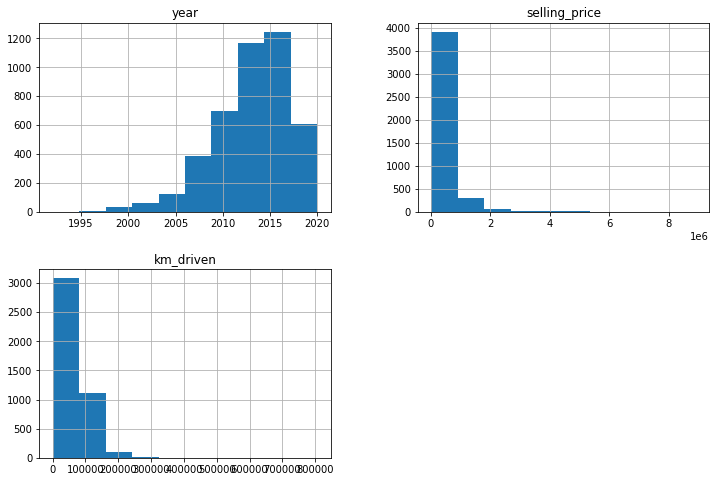

In [9]:
dataset.hist(column=numeric_cols, figsize=(12, 8));

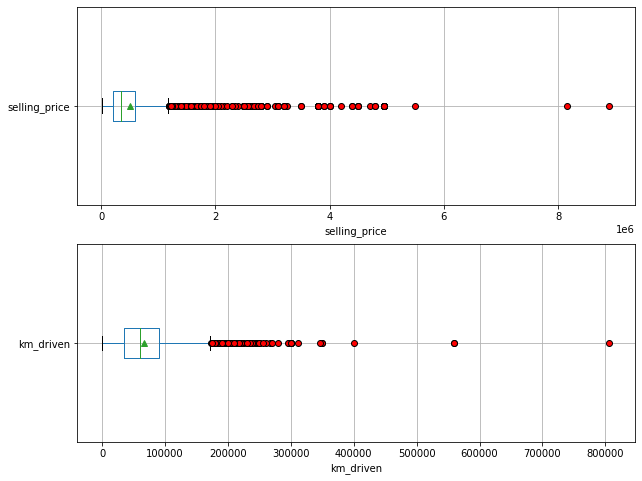

In [10]:
fig, axis = plt.subplots(2, figsize=(10, 8))

for i, col in enumerate(["selling_price", "km_driven"]):
    dataset.boxplot(
        column=col,
        ax=axis[i],
        vert=False,
        showmeans=True,
        flierprops=dict(markerfacecolor="r", marker="o"),
    )
    axis[i].set_xlabel(col)

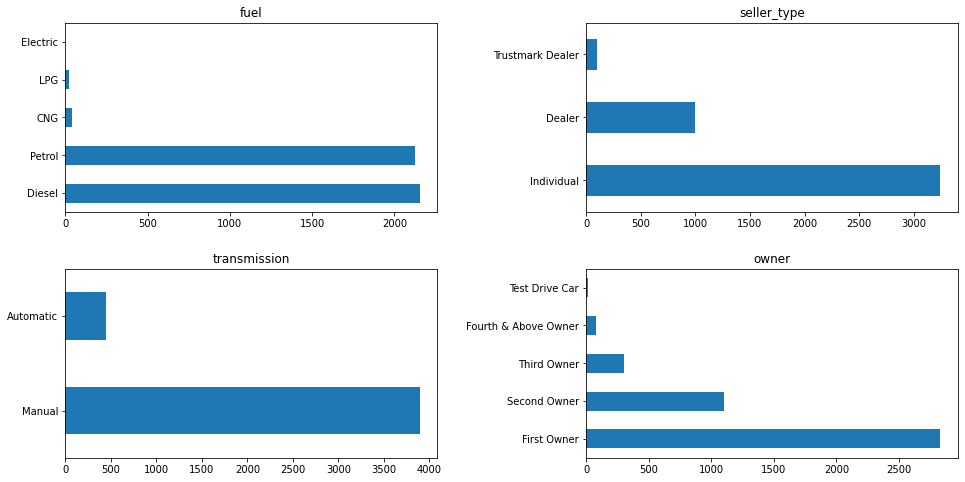

In [11]:
cols = ["fuel", "seller_type", "transmission", "owner"]

fig, axis = plt.subplots(2, 2, figsize=(16, 8))

for i, col in enumerate(cols):
    ax = axis[i // 2, i % 2]
    dataset[col].value_counts().plot.barh(ax=ax)
    ax.set_title(col)

fig.subplots_adjust(wspace=0.4, hspace=0.3)

## Data Preprocessing

We will need to prepare the data before starting training. This step include selecting features and splitting the data.

### Select Features

Using the `year` column, we can compute the age of the used cars. This can be a better feature compared to the raw `year` data.

In [12]:
dataset["age"] = 2021 - dataset["year"]
dataset.drop("year", axis="columns", inplace=True)

dataset.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,age
0,Maruti 800 AC,60000,70000,Petrol,Individual,Manual,First Owner,14
1,Maruti Wagon R LXI Minor,135000,50000,Petrol,Individual,Manual,First Owner,14
2,Hyundai Verna 1.6 SX,600000,100000,Diesel,Individual,Manual,First Owner,9
3,Datsun RediGO T Option,250000,46000,Petrol,Individual,Manual,First Owner,4
4,Honda Amaze VX i-DTEC,450000,141000,Diesel,Individual,Manual,Second Owner,7


Next, we will extract the data into the dependent/target variable and independent/feature variables. We will use `km_driven` and `age` data as features since the other columns has text info that can't be use by a Linear Regression model.

In [13]:
y = dataset["selling_price"].values
print("Shape of y:", y.shape)

x = dataset[["km_driven", "age"]].values
print("Shape of x:", x.shape)

Shape of y: (4340,)
Shape of x: (4340, 2)


We need to reshape `y` into a column vector with the shape of `(4340, 1)`.

In [14]:
y = y.reshape(-1, 1)
print("Shape of y:", y.shape)
print("Shape of x:", x.shape)

Shape of y: (4340, 1)
Shape of x: (4340, 2)


### Split the data into Training and Testing

In order to test our model, we will need to divide our data into two subsets:
- Training set: a subset used to train a model
- Testing set: a subset used to test the trained model. The testing set serves as a proxy for new data to evaluate the generalization of the trained model.
The size of the training set will be 80% of the total data.

In [15]:
def shuffle(x, y):
    indices = np.random.permutation(x.shape[0])
    return x[indices], y[indices]


x, y = shuffle(x, y)

split_pos = int(0.8 * x.shape[0])

x_train, x_test = x[:split_pos], x[split_pos:]
y_train, y_test = y[:split_pos], y[split_pos:]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(3472, 2) (3472, 1)
(868, 2) (868, 1)


## Linear Regression Model

The following code from the previous section defines the Linear Regression class.

In [16]:
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))


def mean_squared_error(y_true, y_pred):
    return np.mean(np.square(y_true - y_pred))


def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(np.mean(np.square(y_true - y_pred)))


class LinearRegression:
    def __init__(self):
        self.w = None

    def fit(self, x, y):
        X = self._add_bias(x)
        self.w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

    def predict(self, x):
        X = self._add_bias(x)
        return X.dot(self.w)

    def evaluate(self, x, y):
        y_pred = self.predict(x)

        mae = mean_absolute_error(y, y_pred)
        mse = mean_squared_error(y, y_pred)
        rmse = root_mean_squared_error(y, y_pred)

        print("MAE:", mae)
        print("MSE:", mse)
        print("RMSE:", rmse)

    def _add_bias(self, x):
        return np.hstack([np.ones((x.shape[0], 1)), x])


model = LinearRegression()

Let's fit the model on the training set and print the evaluation results.

In [17]:
model.fit(x_train, y_train)

print("Model parameters:", model.w)
print("Evaluation results:")
model.evaluate(x_test, y_test)

Model parameters: [[ 9.45511318e+05]
 [-1.93677689e-01]
 [-5.47102269e+04]]
Evaluation results:
MAE: 290074.25873104914
MSE: 394195300627.6546
RMSE: 627849.7436709317
